<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/EDA_customer_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset
df = pd.read_csv('/content/sample_data/customer_booking.csv', encoding= 'ISO-8859-1')
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
# Getting an idea about the duplicates
df.duplicated().sum()

719

In [ ]:
# there are 719 duplicate rows in the dataset

In [6]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Getting an idea about the duplicates
df.duplicated().sum()

0

In [ ]:
# Now, our data is not having any duplicates

In [8]:
# Getting an idea about the Null values
df.isnull().sum().any()


False

In [ ]:
# False means there are no Null values

In [9]:
# Getting an idea baout the datatypes
df.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [10]:
# Getting an idea baout the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [ ]:
'''
Conclusions ->
1. wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals could be converted to boolean data types
2. All other columns are in correct data types.
''''


In [11]:
# Performinf statistical analysis
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
'''
Conclusions ->
1. From the number of passengers column, we can see that  min, 25%, 50%  is at 1, implying that  majority of passengers are travelling solo.
2. From the mean and median, from the pirchase_lead column, we can say that mean is significantly greater than median, implying that there are outliers in the right tail.
3. From flight_hour and flight_duration, we can see that mean and median are approximately equal, implying that data is symmetric.


In [ ]:
# EDA on categorical data


In [13]:
df['wants_extra_baggage'].sum()

32931

In [14]:
df['wants_preferred_seat'].sum()

14569

In [15]:
df['wants_in_flight_meals'].sum()

21025

In [16]:
df['booking_complete'].sum()

7391

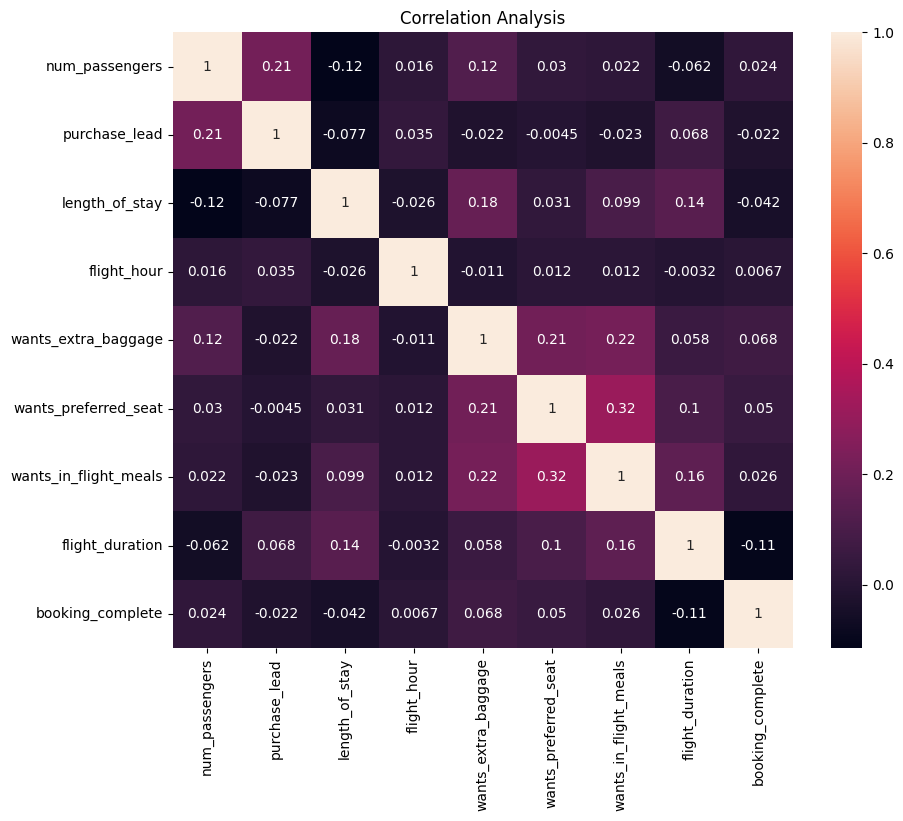

In [21]:
# Correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Analysis')
plt.show()

In [ ]:
'''
Conclusions->
1. 'wants_preferred_seat', 'wants_extra_baggage'and 'wants_in_flight_meals' have a weak positive correlation.
2. other than this all the features  are almost uncorrelated with respect to each other.

In [22]:
# Getting the proportion of values  in the trip_type
df['trip_type'].value_counts(normalize=True)

,proportion
trip_type,
RoundTrip,0.989814
OneWay,0.007833
CircleTrip,0.002354


In [ ]:
# 98.98% of the bookings are for the round trip.

In [24]:
# Getting the proportion of values  in the sales channel
df['sales_channel'].value_counts(normalize=True)

,proportion
sales_channel,
Internet,0.891155
Mobile,0.108845


In [ ]:
# 89% bookings are done from the internet.

In [26]:
# Getting the proportion of values  in the flight day
df['flight_day'].value_counts(normalize=True)

,proportion
flight_day,
Mon,0.162091
Wed,0.153447
Tue,0.153365
Thu,0.148597
Fri,0.135651
Sun,0.130720
Sat,0.116130


In [ ]:
# There is almost equal distribution of data with maximum flights on Monday.

In [28]:
# Getting the proportion of values  in the route
df['route'].value_counts(normalize=True)

,proportion
route,
AKLKUL,0.053165
PENTPE,0.018506
MELSGN,0.016903
ICNSIN,0.016091
DMKKIX,0.014793
...,...
AKLHGH,0.000020
JEDPDG,0.000020
JEDPEN,0.000020


In [ ]:
# AUKKUL (Auckland - Kuala lampur) is the most common route

In [27]:
# Getting the proportion of values  in the booking origin
df['booking_origin'].value_counts(normalize=True)

,proportion
booking_origin,
Australia,0.358982
Malaysia,0.143159
South Korea,0.091354
Japan,0.077494
China,0.066638
...,...
Panama,0.000020
Tonga,0.000020
Tanzania,0.000020


In [ ]:
# Australia, Malaysia, South Korea, Japan and China has major stakes in the bookings.